In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import sys
sys.path.insert(1, "C:/sers/jaege/PycharmProjects/labour-katharina")
from labor_katharina import contraction_features_02
from labor_katharina import regression
from labor_katharina import permutation, labels
import datetime
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from itertools import islice

In [3]:
users = pd.read_pickle('./data/features/train/TTD/2020-01-22_17-08-28/users.pkl')
recordings = pd.read_pickle('./data/features/train/TTD/2020-01-22_17-08-28/recordings.pkl')
features = pd.read_pickle('./data/features/train/TTD/2020-01-22_17-08-28/noEdge/features.pkl')

Mean number of recordings: 18
Median number of recordings: 14


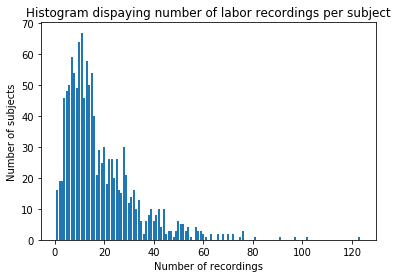

In [162]:
# number of recordings per subject
_, count_tmp = np.unique(recordings['user_id'], return_counts=True)
x,count = np.unique(count_tmp, return_counts=True)
plt.bar(x, count)
plt.title('Histogram dispaying number of recordings per subject')
plt.xlabel('Number of recordings')
plt.ylabel('Number of subjects')

print('Mean number of recordings:', int(np.mean(count_tmp)))
print('Median number of recordings:', int(np.median(count_tmp)))

In [163]:
time_distances = []
# time between recordings
users_id = users['user_id']
for uid in users_id:
    recs = recordings[recordings['user_id']==uid]
    recs = recs.sort_values(by=['created_at'])
    [time_distances.append(s[1][2] - (r[1][2] + r[1][3])) for r, s in zip(recs.iterrows(), islice(recs.iterrows(), 1, None))]

In [164]:
time_distances_ = [np.floor(x/pd.Timedelta('1 hour')) for x in time_distances] #if x < pd.Timedelta('0 hours')]

Mean time between two recordings: 26 hours
Median time between two recordings: 15 hours


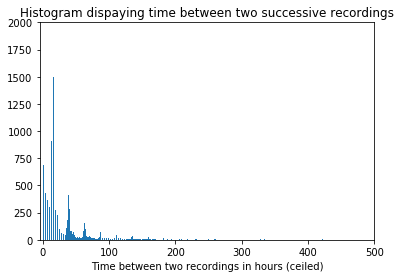

In [178]:
x,count = np.unique(time_distances_, return_counts=True)
plt.bar(x, count)
plt.title('Histogram dispaying time between two successive recordings')
plt.xlabel('Time between two recordings in hours (ceiled)')
plt.ylim([0, 2000])
plt.xlim([-5, 500])

print('Mean time between two recordings:', int(np.mean(time_distances_)), 'hours')
print('Median time between two recordings:', int(np.median(time_distances_)), 'hours')



<BarContainer object of 21 artists>

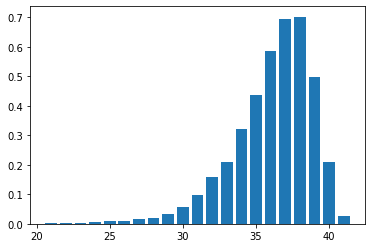

In [179]:
# percentage of women that have recording in pregnancy week between 20-41
recordings['gestational_age'] = [((sw.date()-dd).days+280.0)/7.0 for sw,dd in zip(recordings['created_at'], users.loc[recordings['user_id'], 'due_date'])]
recordings['gestational_age'] = np.floor(recordings['gestational_age'])
users_id = users['user_id']
weeks = set(recordings['gestational_age'])

perc = []
for week in weeks:
    rec_w = recordings[recordings['gestational_age']==week]
    perc.append(len(set(rec_w['user_id']) & set(users_id)))
perc = np.divide(perc,len(users_id))

plt.bar(list(weeks), list(perc))

In [ ]:
## Defining the max number of timesteps for LSTM input vector

In [7]:
#how many features per subject? 
# what is the maximum number of features that a subject can have?
uids = list(set(features['user_id']))
count_features_pS = [features[features['user_id']==u].shape[0] for u in uids]

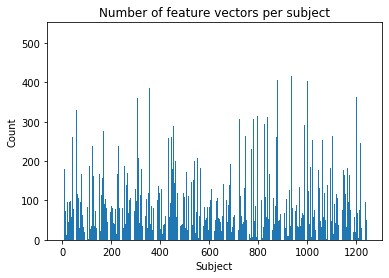

Maximal number of feature vectors a subject has in dataset: 526
Mean number of feature vectors a subject has in dataset: 99.81591639871382
Decision: 550 feature vectors per subject (time dimension)


In [16]:
plt.bar(range(1244),count_features_pS)
plt.ylabel('Count')
plt.xlabel('Subject')
plt.title('Number of feature vectors per subject')
plt.show()

print('Maximal number of feature vectors a subject has in dataset:', max(count_features_pS))
print('Mean number of feature vectors a subject has in dataset:', np.mean(count_features_pS))
print('Decision: 550 feature vectors per subject (time dimension)')



range(0, 1244)